<a href="https://colab.research.google.com/github/AsutoshDalei/Deep-Neural-Networks/blob/master/Campus_Recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campus Recruitment

### Academic and Employability Factors influencing placement

This data set consists of Placement data of students in the Jain University, Bangalore campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.utils import shuffle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


**Importing the dataset**

In [0]:
df=pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv',index_col='sl_no')
print(df.shape)
df.head(5)

(215, 14)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


We look into the type of data present in our features. 

We see that the feature 'salary' has only 148 non null samples while the rest have 215 each. This indicates presence of null values under 'salary'

In [0]:
print(df.info())
df[pd.isnull(df.salary)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB
None


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN


Using fillna, we replace the nan values in 'salary' with 0. 

This is because, all nan salary values were instances who were not placed. 
Naturally having no salary

In [0]:
df.salary.fillna(0,inplace=True)
df[pd.isnull(df.salary)]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,


We now seperate the columns which are object features and those who have numeric features.

The unique values in each object features in printed. 

In [0]:
objcol=df.columns[df.dtypes=='object']
floatcol=df.columns[df.dtypes!='object']
for i in range(len(objcol)):
    print(objcol[i]+':')
    print(pd.unique(df[objcol[i]]))

gender:
['M' 'F']
ssc_b:
['Others' 'Central']
hsc_b:
['Others' 'Central']
hsc_s:
['Commerce' 'Science' 'Arts']
degree_t:
['Sci&Tech' 'Comm&Mgmt' 'Others']
workex:
['No' 'Yes']
specialisation:
['Mkt&HR' 'Mkt&Fin']
status:
['Placed' 'Not Placed']


# Visualization of the data

This map shows how numerical features are correlated.

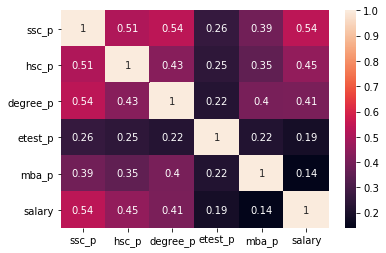

In [0]:
sns.heatmap(df[floatcol].corr(),annot=True)

This plot shows us a bar graph of how salary is distributed among the categories of the object columns

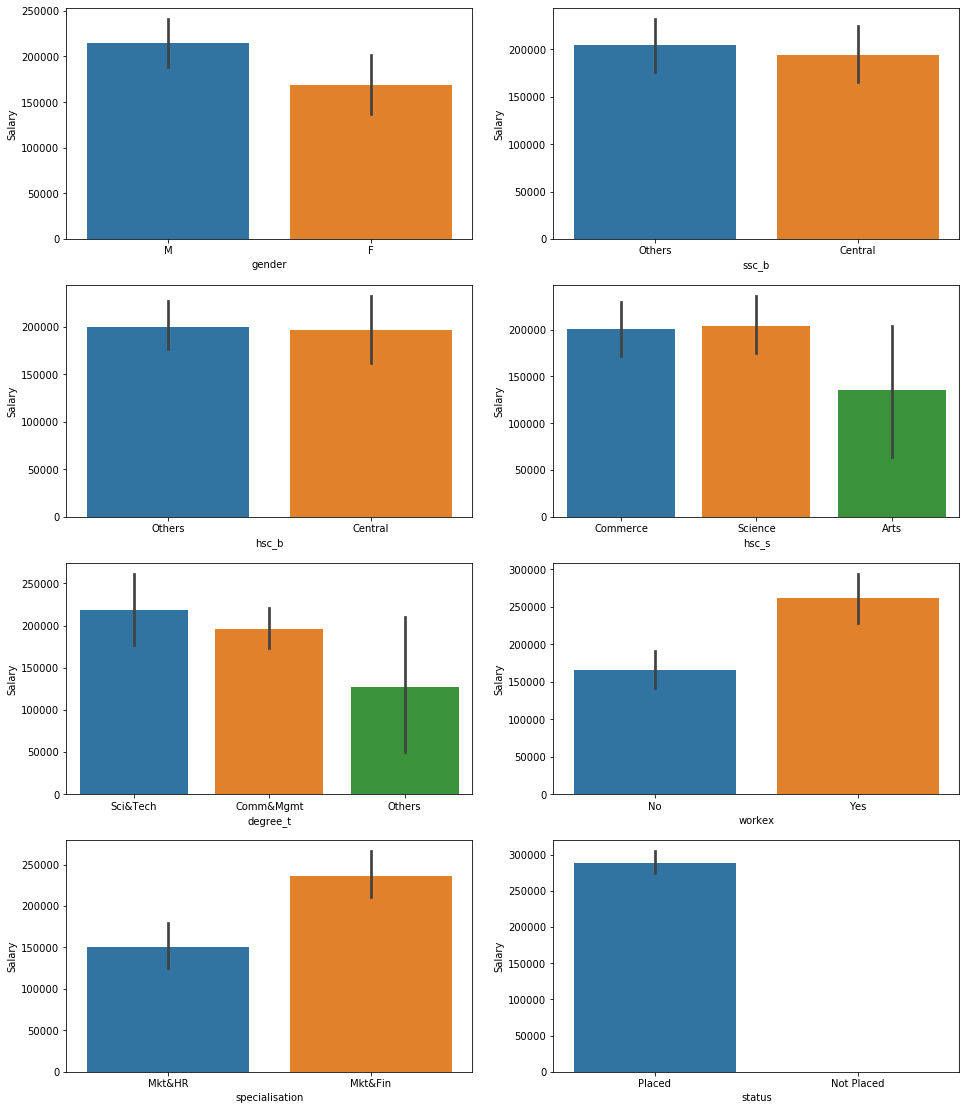

In [0]:
_,_=plt.subplots(figsize=(16,40))
for i in range(len(objcol)):
    name=objcol[i]
    plt.subplot(objcol.shape[0],2,i+1)
    sns.barplot(x=df[name],y=df.salary)
    plt.ylabel("Salary")
plt.show()       

This plot shows how each numeric feature is distributed. A regression line is also added to better understand the distribution.



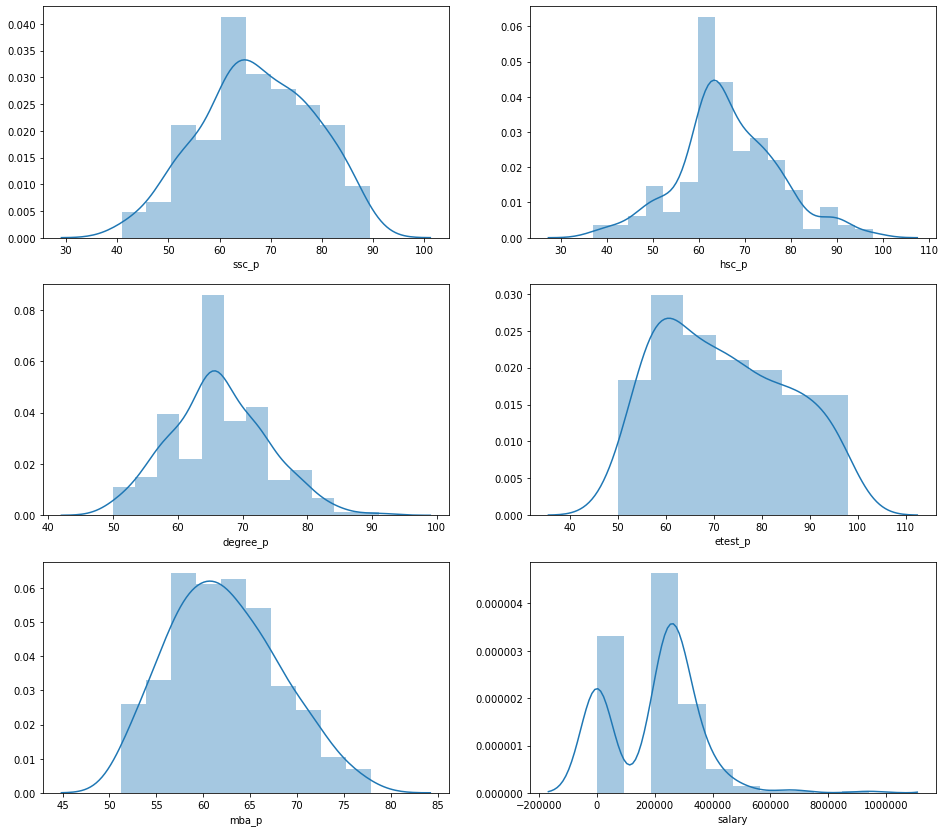

In [0]:
_,_=plt.subplots(figsize=(16,40))
for i in range(len(floatcol)):
    name=floatcol[i]
    plt.subplot(objcol.shape[0],2,i+1)
    #sns.regplot(x=df[name],y=df.salary)
    sns.distplot(a=df[name])
plt.show()       


# Label Encoding and Feature Selection
From the visualization of data, we observe that the features **'hsc_b'** and **'ssc_b'** don't really matter in this network. The categories present in these features show equal amount of salary offered. Hence we shall not be considering them for the learning procedure.


Moreover, neural networks do not accept categorical data. Hence we label encode them into nemerical data.

In [0]:
featurecol=objcol.drop(['hsc_b','ssc_b','degree_t','hsc_s'])
df.drop(['hsc_b','ssc_b'],inplace=True,axis=1)

In [0]:
lenc=LabelEncoder()
for i in range(len(featurecol)):
    name=featurecol[i]
    df[name]=lenc.fit_transform(df[name])
names=['degree_t','hsc_s']
df=pd.get_dummies(df,columns=names,prefix=names)

In [0]:
print(df.shape)
df.head(5)

(215, 16)


,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science
sl_no,,,,,,,,,,,,,,,,
1,1,67.00,91.00,58.00,0,55.0,1,58.80,1,270000.0,0,0,1,0,1,0
2,1,79.33,78.33,77.48,1,86.5,0,66.28,1,200000.0,0,0,1,0,0,1
3,1,65.00,68.00,64.00,0,75.0,0,57.80,1,250000.0,1,0,0,1,0,0
4,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0.0,0,0,1,0,0,1
5,1,85.80,73.60,73.30,0,96.8,0,55.50,1,425000.0,1,0,0,0,1,0


We **shuffle** the data and **scale** them to their **Minimum and Maximum values.**

In [0]:
tardata=shuffle(df.loc[:,['status','salary']])
indata=shuffle(df.drop(['status','salary'],axis=1))

sca=MinMaxScaler()

scain=sca.fit_transform(indata)
scatar=sca.fit_transform(tardata)

# Regression Model

The input and target data is now divided into training, validation and testing data.

The ratio being:
* 70% for training
* 15% for validation
* 15% for testing

In [0]:
trainsample=int(indata.shape[0]*0.7)
valsample=int(indata.shape[0]*0.15)

trainip,trainop=scain[:trainsample,:],scatar[:trainsample,:]
valip,valop=scain[trainsample:trainsample+valsample,:],scatar[trainsample:trainsample+valsample,:]
testip,testop=scain[trainsample+valsample:,:],scatar[trainsample+valsample:,:]

We use the adam optimizer here with a learning rate of 0.001 and a batch size of 16.

In [0]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(2),
                            ])

opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
hist=model.fit(x=trainip,y=trainop,epochs=200,validation_data=(valip,valop),batch_size=16)


Train on 150 samples, validate on 32 samples
Epoch 1/200
150/150 [==============================] - 0s 3ms/sample - loss: 0.3513 - accuracy: 0.9467 - val_loss: 0.3651 - val_accuracy: 0.9688
Epoch 2/200
150/150 [==============================] - 0s 170us/sample - loss: 0.3274 - accuracy: 0.9933 - val_loss: 0.3344 - val_accuracy: 1.0000
Epoch 3/200
150/150 [==============================] - 0s 152us/sample - loss: 0.3009 - accuracy: 1.0000 - val_loss: 0.3012 - val_accuracy: 1.0000
Epoch 4/200
150/150 [==============================] - 0s 155us/sample - loss: 0.2726 - accuracy: 1.0000 - val_loss: 0.2681 - val_accuracy: 1.0000
Epoch 5/200
150/150 [==============================] - 0s 164us/sample - loss: 0.2392 - accuracy: 1.0000 - val_loss: 0.2291 - val_accuracy: 1.0000
Epoch 6/200
150/150 [==============================] - 0s 164us/sample - loss: 0.1985 - accuracy: 1.0000 - val_loss: 0.1881 - val_accuracy: 1.0000
Epoch 7/200
150/150 [==============================] - 0s 161us/sample - lo

150/150 [==============================] - 0s 159us/sample - loss: 0.1130 - accuracy: 1.0000 - val_loss: 0.1207 - val_accuracy: 1.0000
Epoch 57/200
150/150 [==============================] - 0s 165us/sample - loss: 0.1135 - accuracy: 1.0000 - val_loss: 0.1224 - val_accuracy: 1.0000
Epoch 58/200
150/150 [==============================] - 0s 152us/sample - loss: 0.1129 - accuracy: 1.0000 - val_loss: 0.1209 - val_accuracy: 1.0000
Epoch 59/200
150/150 [==============================] - 0s 159us/sample - loss: 0.1124 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 1.0000
Epoch 60/200
150/150 [==============================] - 0s 163us/sample - loss: 0.1127 - accuracy: 1.0000 - val_loss: 0.1200 - val_accuracy: 1.0000
Epoch 61/200
150/150 [==============================] - 0s 168us/sample - loss: 0.1128 - accuracy: 1.0000 - val_loss: 0.1216 - val_accuracy: 1.0000
Epoch 62/200
150/150 [==============================] - 0s 155us/sample - loss: 0.1127 - accuracy: 1.0000 - val_loss: 0.1220 

150/150 [==============================] - 0s 157us/sample - loss: 0.0969 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 1.0000
Epoch 112/200
150/150 [==============================] - 0s 162us/sample - loss: 0.0971 - accuracy: 1.0000 - val_loss: 0.1462 - val_accuracy: 1.0000
Epoch 113/200
150/150 [==============================] - 0s 154us/sample - loss: 0.0965 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 1.0000
Epoch 114/200
150/150 [==============================] - 0s 161us/sample - loss: 0.0964 - accuracy: 1.0000 - val_loss: 0.1470 - val_accuracy: 1.0000
Epoch 115/200
150/150 [==============================] - 0s 159us/sample - loss: 0.0962 - accuracy: 1.0000 - val_loss: 0.1473 - val_accuracy: 1.0000
Epoch 116/200
150/150 [==============================] - 0s 148us/sample - loss: 0.0962 - accuracy: 1.0000 - val_loss: 0.1477 - val_accuracy: 1.0000
Epoch 117/200
150/150 [==============================] - 0s 158us/sample - loss: 0.0957 - accuracy: 1.0000 - val_loss: 0

150/150 [==============================] - 0s 164us/sample - loss: 0.0875 - accuracy: 1.0000 - val_loss: 0.1534 - val_accuracy: 1.0000
Epoch 167/200
150/150 [==============================] - 0s 148us/sample - loss: 0.0875 - accuracy: 1.0000 - val_loss: 0.1537 - val_accuracy: 1.0000
Epoch 168/200
150/150 [==============================] - 0s 154us/sample - loss: 0.0869 - accuracy: 1.0000 - val_loss: 0.1505 - val_accuracy: 1.0000
Epoch 169/200
150/150 [==============================] - 0s 160us/sample - loss: 0.0867 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 1.0000
Epoch 170/200
150/150 [==============================] - 0s 160us/sample - loss: 0.0866 - accuracy: 1.0000 - val_loss: 0.1499 - val_accuracy: 1.0000
Epoch 171/200
150/150 [==============================] - 0s 153us/sample - loss: 0.0866 - accuracy: 1.0000 - val_loss: 0.1516 - val_accuracy: 1.0000
Epoch 172/200
150/150 [==============================] - 0s 160us/sample - loss: 0.0864 - accuracy: 1.0000 - val_loss: 0

This plot shows us how the loss, accuracy and validation loss varies as we go through number of epochs.

This is critical in understanding our model's performance

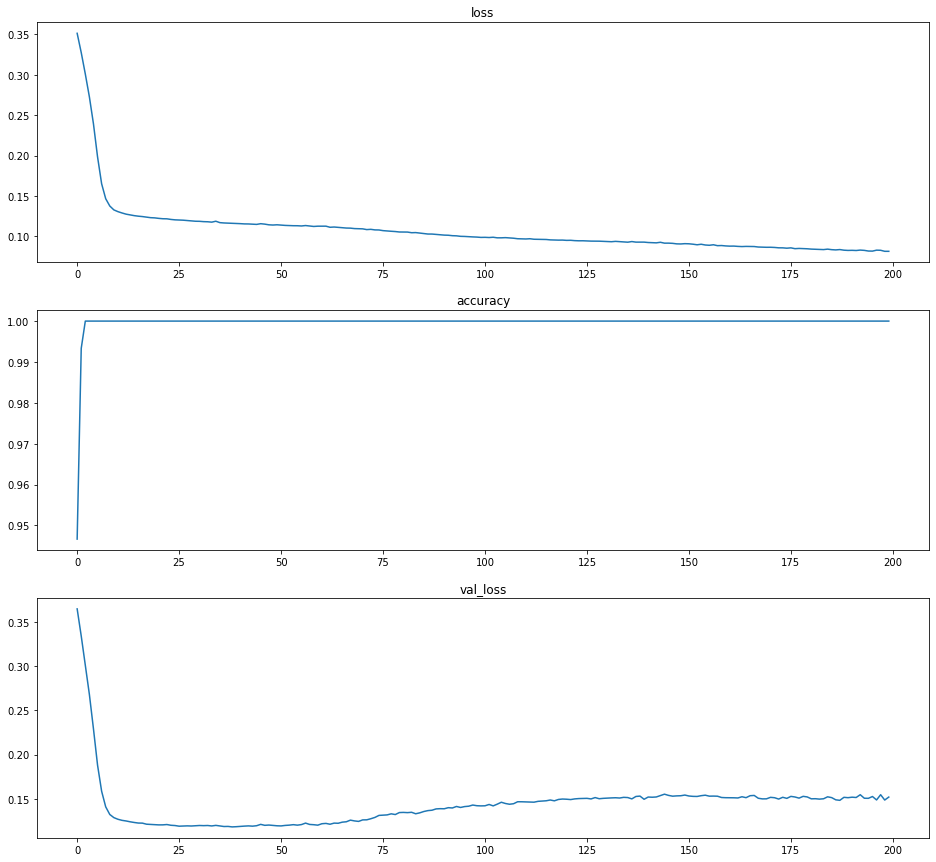

In [0]:
_,_=plt.subplots(figsize=(16,15))
#plt.subplot(1,1,1)
plt.subplot(3,1,1)
plt.title('loss')
plt.plot(hist.history['loss'])
plt.subplot(3,1,2)
plt.title('accuracy')
plt.plot(hist.history['accuracy'])
plt.subplot(3,1,3)
plt.title('val_loss')
plt.plot(hist.history['val_loss'])
plt.show()

We know that the validationloss should not rise. When it does, the training must stop. This indicates that our model is overfitting. 

Therefore, we train our model to just 70 epochs. This would give us an ideal model

**Final training**

In [0]:
model.fit(x=trainip,y=trainop,epochs=70,validation_data=(valip,valop),batch_size=16)

Train on 150 samples, validate on 32 samples
Epoch 1/70
150/150 [==============================] - 0s 182us/sample - loss: 0.0814 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 1.0000
Epoch 2/70
150/150 [==============================] - 0s 148us/sample - loss: 0.0811 - accuracy: 1.0000 - val_loss: 0.1509 - val_accuracy: 1.0000
Epoch 3/70
150/150 [==============================] - 0s 153us/sample - loss: 0.0807 - accuracy: 1.0000 - val_loss: 0.1525 - val_accuracy: 1.0000
Epoch 4/70
150/150 [==============================] - 0s 158us/sample - loss: 0.0805 - accuracy: 1.0000 - val_loss: 0.1533 - val_accuracy: 1.0000
Epoch 5/70
150/150 [==============================] - 0s 154us/sample - loss: 0.0805 - accuracy: 1.0000 - val_loss: 0.1532 - val_accuracy: 1.0000
Epoch 6/70
150/150 [==============================] - 0s 149us/sample - loss: 0.0800 - accuracy: 1.0000 - val_loss: 0.1507 - val_accuracy: 1.0000
Epoch 7/70
150/150 [==============================] - 0s 153us/sample - loss: 0

150/150 [==============================] - 0s 156us/sample - loss: 0.0741 - accuracy: 1.0000 - val_loss: 0.1591 - val_accuracy: 1.0000
Epoch 57/70
150/150 [==============================] - 0s 162us/sample - loss: 0.0734 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 1.0000
Epoch 58/70
150/150 [==============================] - 0s 149us/sample - loss: 0.0723 - accuracy: 1.0000 - val_loss: 0.1562 - val_accuracy: 1.0000
Epoch 59/70
150/150 [==============================] - 0s 159us/sample - loss: 0.0724 - accuracy: 1.0000 - val_loss: 0.1592 - val_accuracy: 1.0000
Epoch 60/70
150/150 [==============================] - 0s 156us/sample - loss: 0.0723 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 1.0000
Epoch 61/70
150/150 [==============================] - 0s 157us/sample - loss: 0.0721 - accuracy: 1.0000 - val_loss: 0.1579 - val_accuracy: 1.0000
Epoch 62/70
150/150 [==============================] - 0s 152us/sample - loss: 0.0719 - accuracy: 1.0000 - val_loss: 0.1602 - val_

Finally evaluating our model with **test data**.

We obtain the final accuracy and loss of our model when test data is used.

In [0]:
loss,acc=model.evaluate(testip,testop)
print('Loss:{0:.2f}   Accuracy:{1:.3f}'.format(loss,acc*100))

33/33 [==============================] - 0s 199us/sample - loss: 0.1761 - accuracy: 0.9697
Loss:0.18   Accuracy:96.970
